# Desempenho no ENEM e gênero: uma análise exploratória


## Introdução

Este notebook faz parte de um projeto de análise exploratória dos dados do ENEM 2023, com foco na performance dos estudantes nas diferentes áreas do conhecimento, considerando o recorte de gênero.

A motivação central é investigar se existe evidência nos dados do ENEM que ajude a entender por que há uma presença significativamente menor de mulheres nos cursos de tecnologia da informação (TI), apesar do bom desempenho feminino em disciplinas relacionadas à área.


## Carregamento e seleção de dados

A base de dados utilizada é o microdado do ENEM 2023, disponibilizado pelo INEP. Por questões de desempenho e clareza, selecionamos apenas os campos relevantes para a análise proposta, focando nas notas por disciplina e no gênero do participante.

As colunas selecionadas foram:

- `TP_SEXO`: Identificação do sexo (M ou F)
- `NU_NOTA_CN`: Nota de Ciências da Natureza
- `NU_NOTA_CH`: Nota de Ciências Humanas
- `NU_NOTA_LC`: Nota de Linguagens e Códigos
- `NU_NOTA_MT`: Nota de Matemática
- `NU_NOTA_REDACAO`: Nota da Redação

Também foi criada uma coluna auxiliar (`DS_TP_SEXO`) com a descrição do gênero para facilitar a visualização dos gráficos.

As etapas seguintes incluem limpeza dos dados (remoção de nulos), análise descritiva e construção de gráficos comparativos.

In [ ]:
caminho = '../data/raw/MICRODADOS_ENEM_2023.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configuração bonita
sns.set(style='whitegrid')

# Defina colunas que você quer
colunas = ['TP_SEXO', 'NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']

# Lê em chunks
resultados = []
for chunk in pd.read_csv(caminho, sep=';', encoding='latin1', usecols=colunas, chunksize=1000000):
    # Remover linhas sem nota de matemática
    chunk = chunk.dropna(subset=['NU_NOTA_MT'])
    resultados.append(chunk)

# Junta todos os pedaços
df_filtrado = pd.concat(resultados)

# Cria nova coluna DESCRICAO_SEXO com os rótulos
df_filtrado['DS_TP_SEXO'] = df_filtrado['TP_SEXO'].replace({'F': 'Masculino', 'M': 'Feminino'})

# Salva resultado limpo
df_filtrado.to_csv('../data/processed/enem_filtrado.csv', index=False)

In [40]:
df_filtrado.head(20)

,TP_SEXO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,DS_TP_SEXO
2,F,502.0,498.9,475.6,363.2,700.0,Masculino
3,F,459.0,508.5,507.2,466.7,880.0,Masculino
4,F,402.5,379.2,446.9,338.3,560.0,Masculino
9,M,564.7,630.3,610.4,680.2,600.0,Feminino
10,M,644.9,620.2,626.9,736.3,860.0,Feminino
11,M,608.2,667.6,607.9,691.9,780.0,Feminino
13,F,626.5,604.9,614.3,548.8,800.0,Masculino
14,F,547.2,623.3,593.7,404.6,560.0,Masculino
15,F,510.8,313.4,388.5,415.6,560.0,Masculino
16,F,515.7,553.1,544.4,437.0,880.0,Masculino


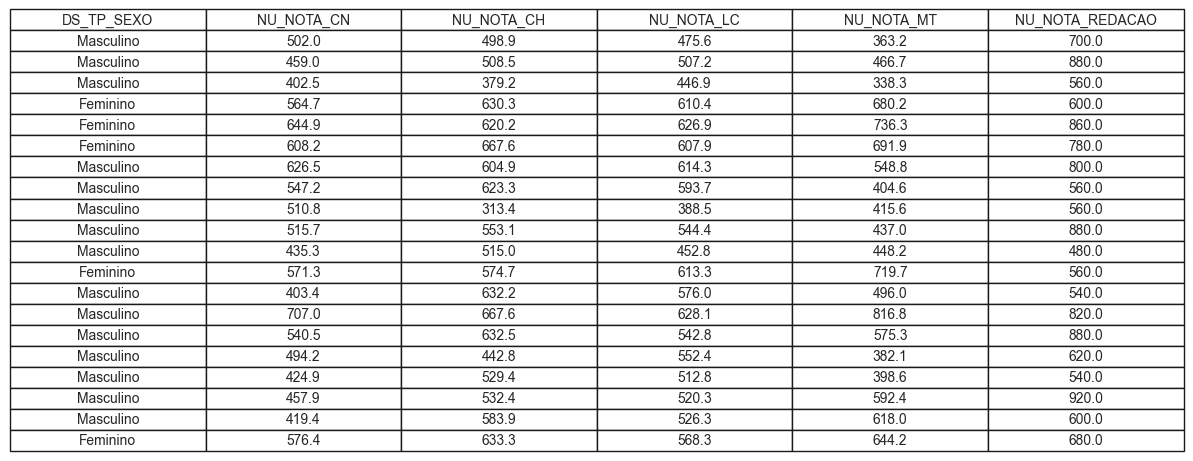

In [42]:
import matplotlib.pyplot as plt

# Seleciona as colunas desejadas
colunas_exibidas = [
    'DS_TP_SEXO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'
]
dados_exibidos = df_filtrado[colunas_exibidas].head(20).copy()

# Arredonda apenas as colunas numéricas
colunas_numericas = dados_exibidos.select_dtypes(include='number').columns
dados_exibidos[colunas_numericas] = dados_exibidos[colunas_numericas].round(1)

# Cria a figura e oculta os eixos
fig, ax = plt.subplots(figsize=(12, 5))
ax.axis('off')

# Cria a tabela
tabela = ax.table(
    cellText=dados_exibidos.values,
    colLabels=dados_exibidos.columns,
    cellLoc='center',
    loc='center'
)

# Estilo
tabela.auto_set_font_size(False)
tabela.set_fontsize(10)
tabela.scale(1.2, 1.5)

plt.tight_layout()
plt.show()

In [15]:
df_filtrado.info()
df_filtrado.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 2692427 entries, 2 to 3933953
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TP_SEXO          object 
 1   NU_NOTA_CN       float64
 2   NU_NOTA_CH       float64
 3   NU_NOTA_LC       float64
 4   NU_NOTA_MT       float64
 5   NU_NOTA_REDACAO  float64
 6   DS_TP_SEXO       object 
dtypes: float64(5), object(2)
memory usage: 164.3+ MB


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,2.692427e+06,2.678264e+06,2.678264e+06,2.692427e+06,2.678264e+06
mean,4.957515e+02,5.262042e+02,5.202973e+02,5.338357e+02,6.266020e+02
std,8.792872e+01,8.680629e+01,7.412317e+01,1.316478e+02,2.090321e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.405000e+02,4.712000e+02,4.737000e+02,4.312000e+02,5.200000e+02
50%,4.939000e+02,5.329000e+02,5.249000e+02,5.236000e+02,6.200000e+02
75%,5.512000e+02,5.869000e+02,5.718000e+02,6.301000e+02,7.800000e+02
max,8.684000e+02,8.230000e+02,8.208000e+02,9.586000e+02,1.000000e+03


## Análise descritiva e visualização

Com os dados filtrados e tratados, iniciamos a exploração dos resultados por disciplina, com o objetivo de responder à seguinte pergunta:

**"As mulheres realmente têm desempenho inferior em áreas exatas?"**

Para isso, utilizamos gráficos segmentando os dados por gênero. Esses gráficos nos permitem observar:

- A **média de desempenho** por gênero em cada disciplina;
- A **distribuição das notas** e os extremos (valores mais altos e baixos);
- A presença de possíveis **padrões ou outliers** que indiquem diferenças relevantes.


/var/folders/99/cdjmtrk17ss1sh19v_wrtv9r0000gn/T/ipykernel_34440/245082678.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_filtrado, x='DS_TP_SEXO', y='NU_NOTA_MT', ci=None , palette={'Feminino': '#76c893', 'Masculino': '#495057'})
/var/folders/99/cdjmtrk17ss1sh19v_wrtv9r0000gn/T/ipykernel_34440/245082678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtrado, x='DS_TP_SEXO', y='NU_NOTA_MT', ci=None , palette={'Feminino': '#76c893', 'Masculino': '#495057'})


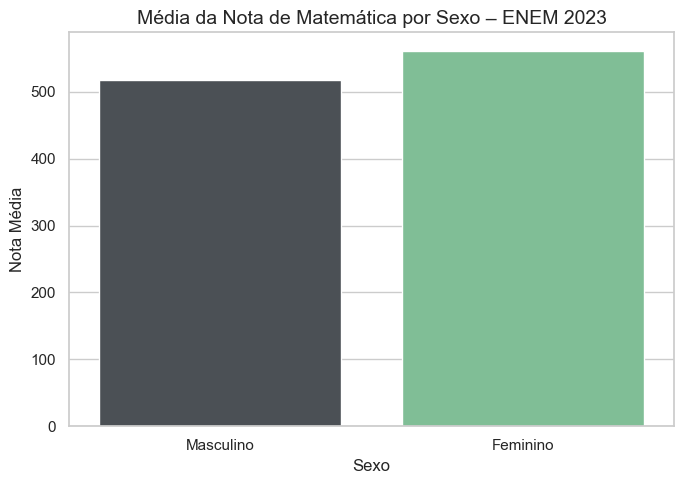

In [29]:
plt.figure(figsize=(7, 5))
sns.barplot(data=df_filtrado, x='DS_TP_SEXO', y='NU_NOTA_MT', ci=None , palette={'Feminino': '#76c893', 'Masculino': '#495057'})

plt.title('Média da Nota de Matemática por Sexo – ENEM 2023', fontsize=14)
plt.xlabel('Sexo')
plt.ylabel('Nota Média')
plt.tight_layout()
plt.savefig(f'../figures/kde_media_enem_matematica_por_sexo.png')
plt.show()


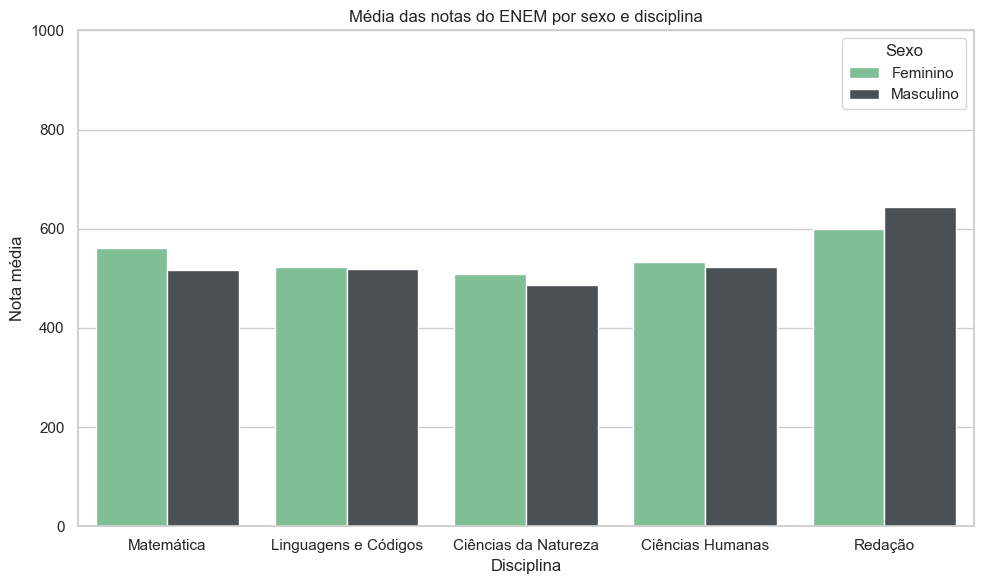

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dicionário de disciplinas com nomes legíveis
disciplinas_nomes_legiveis = {
    'NU_NOTA_MT': 'Matemática',
    'NU_NOTA_LC': 'Linguagens e Códigos',
    'NU_NOTA_CN': 'Ciências da Natureza',
    'NU_NOTA_CH': 'Ciências Humanas',
    'NU_NOTA_REDACAO': 'Redação'
}

# Cálculo da média por sexo e disciplina
medias_por_sexo = df_filtrado.groupby('DS_TP_SEXO')[list(disciplinas_nomes_legiveis.keys())].mean()
medias_por_sexo = medias_por_sexo.rename(columns=disciplinas_nomes_legiveis)

# Transforma para formato longo para facilitar o gráfico
df_plot = medias_por_sexo.T.reset_index().melt(id_vars='index', var_name='Sexo', value_name='Nota Média')
df_plot = df_plot.rename(columns={'index': 'Disciplina'})

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='Disciplina', y='Nota Média', hue='Sexo', palette={'Feminino': '#76c893', 'Masculino': '#495057'})

plt.title('Média das notas do ENEM por sexo e disciplina')
plt.ylabel('Nota média')
plt.xlabel('Disciplina')
plt.ylim(0, 1000)
plt.legend(title='Sexo')
plt.tight_layout()
plt.savefig(f'../figures/kde_media_enem_por_sexo.png')
plt.show()

In [ ]:
disciplinas = ['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_REDACAO']

for col in disciplinas:
    df_filtrado = df_filtrado[df_filtrado[col] > 0]

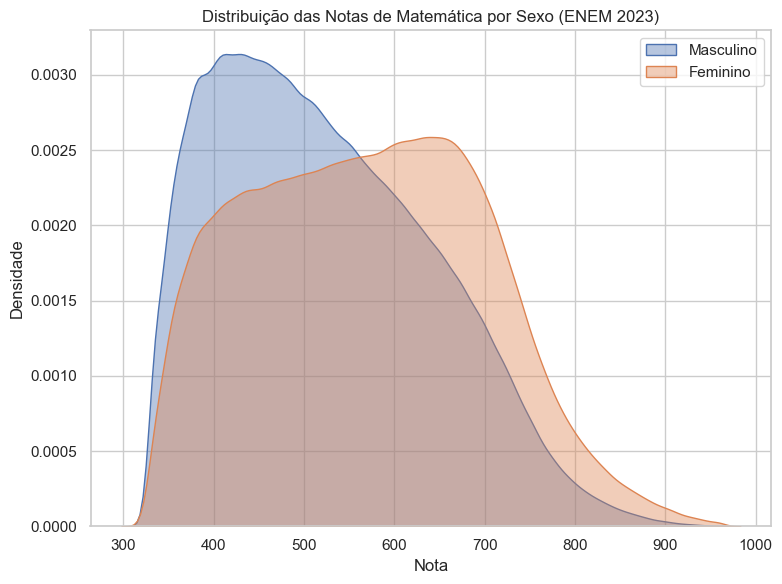

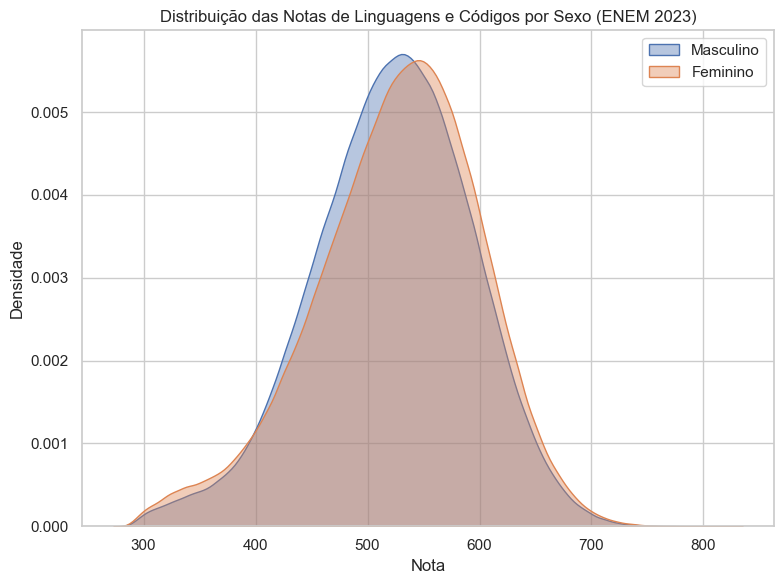

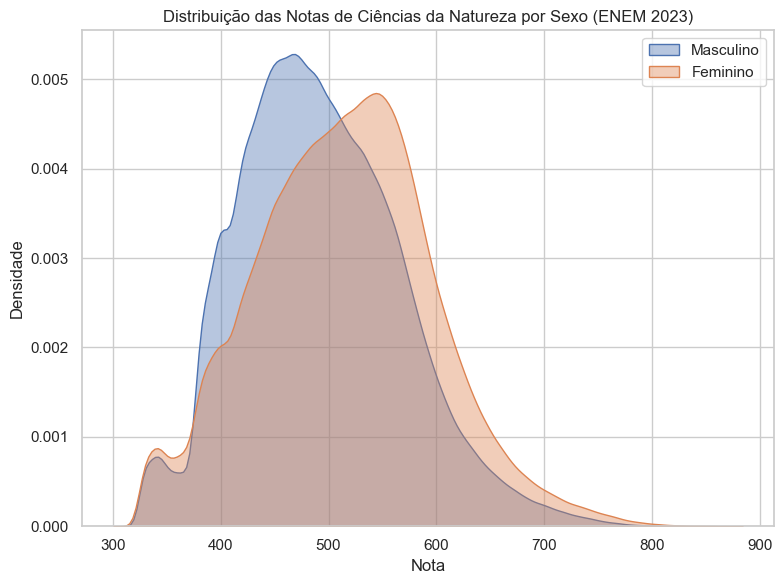

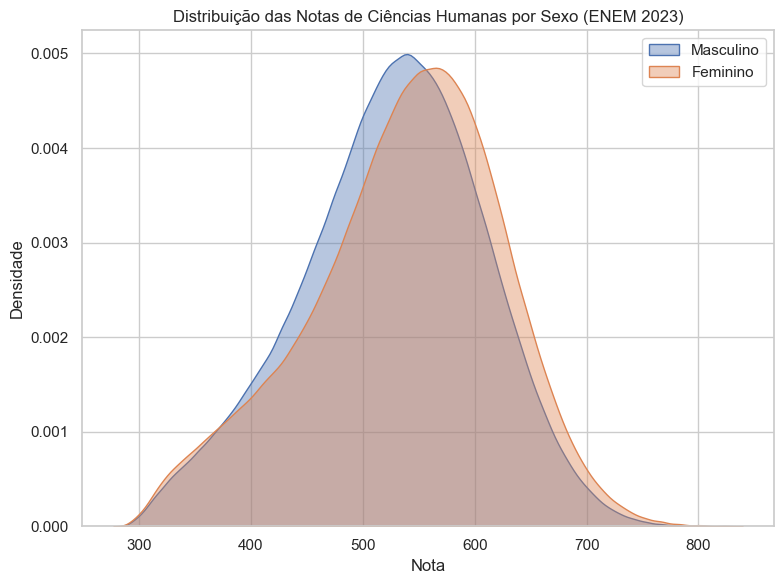

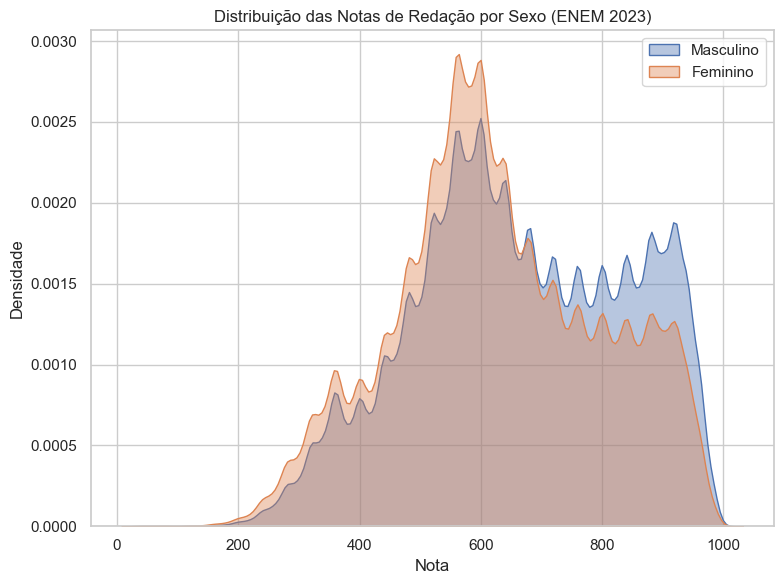

In [9]:
disciplinas_nomes_legiveis = {
    'NU_NOTA_MT': 'Matemática',
    'NU_NOTA_LC': 'Linguagens e Códigos',
    'NU_NOTA_CN': 'Ciências da Natureza',
    'NU_NOTA_CH': 'Ciências Humanas',
    'NU_NOTA_REDACAO': 'Redação'
}

for col in disciplinas:
    plt.figure(figsize=(8,6))
    sns.kdeplot(
        data=df_filtrado[df_filtrado['DS_TP_SEXO']=='Masculino'][col],
        label='Masculino',
        fill=True,
        alpha=0.4
    )
    sns.kdeplot(
        data=df_filtrado[df_filtrado['DS_TP_SEXO']=='Feminino'][col],
        label='Feminino',
        fill=True,
        alpha=0.4
    )
    plt.title(f'Distribuição das Notas de {disciplinas_nomes_legiveis[col]} por Sexo (ENEM 2023)')
    plt.xlabel('Nota')
    plt.ylabel('Densidade')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'../figures/kde_{col.lower()}_por_sexo.png')
    plt.show()

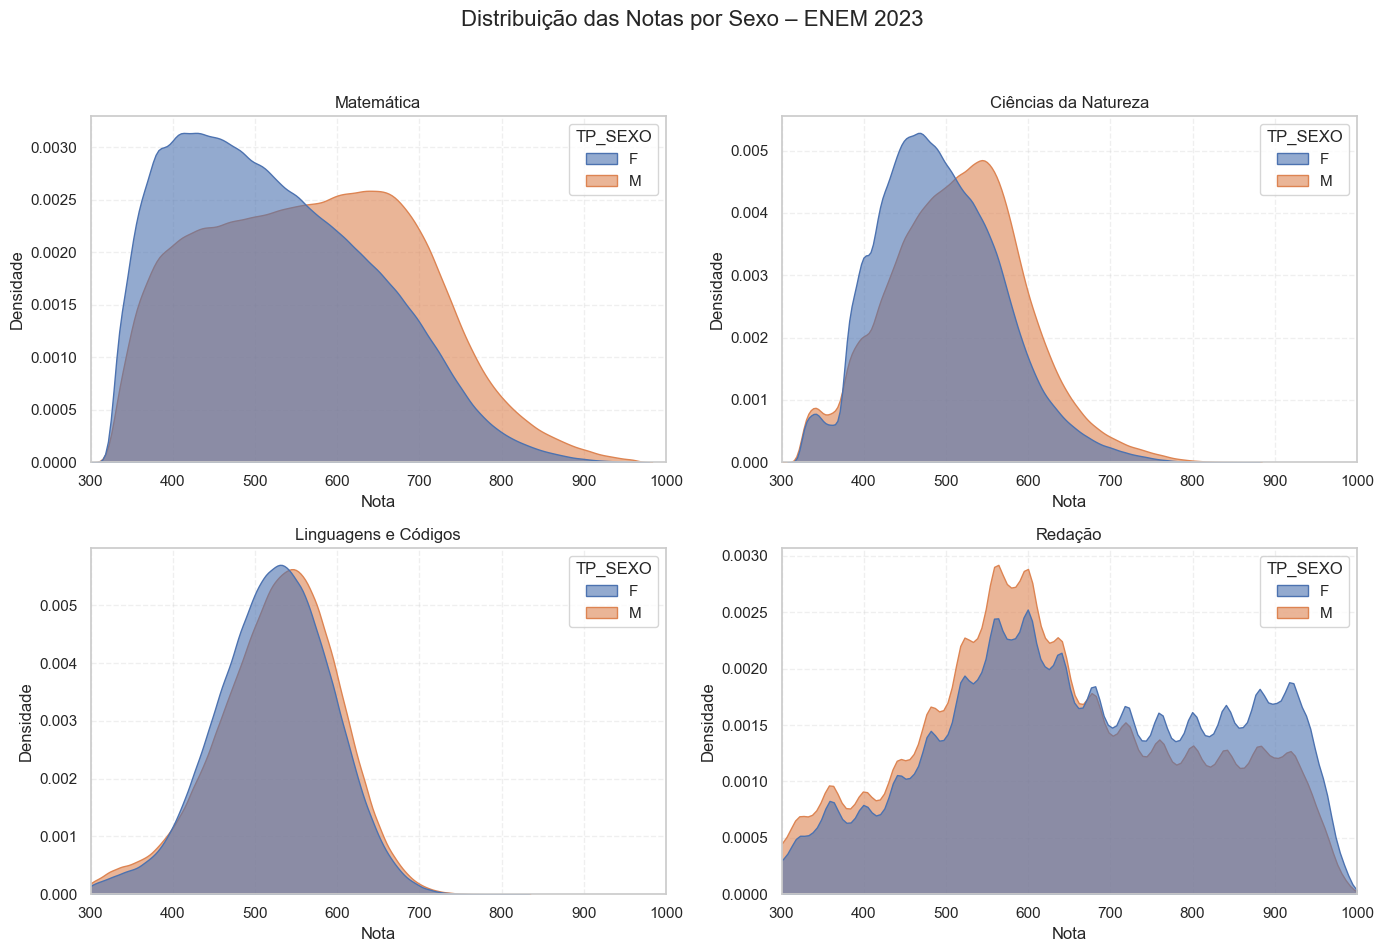

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
materias = {
    'NU_NOTA_MT': 'Matemática',
    'NU_NOTA_CN': 'Ciências da Natureza',
    'NU_NOTA_LC': 'Linguagens e Códigos',
    'NU_NOTA_REDACAO': 'Redação'
}

for ax, (coluna, titulo) in zip(axs.flat, materias.items()):
    sns.kdeplot(data=df_filtrado, x=coluna, hue='TP_SEXO', fill=True, common_norm=False,
                palette=['#4C72B0', '#DD8452'], alpha=0.6, ax=ax)
    
    media_fem = df_filtrado[df_filtrado['TP_SEXO'] == 'Feminino'][coluna].mean()
    media_masc = df_filtrado[df_filtrado['TP_SEXO'] == 'Masculino'][coluna].mean()
    
    ax.axvline(media_fem, color='#DD8452', linestyle='--')
    ax.axvline(media_masc, color='#4C72B0', linestyle='--')
    
    ax.set_title(titulo)
    ax.set_xlim(300, 1000)
    ax.set_xlabel('Nota')
    ax.set_ylabel('Densidade')
    ax.grid(True, linestyle='--', alpha=0.3)

fig.suptitle('Distribuição das Notas por Sexo – ENEM 2023', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
print("Notebook desenvolvido por Queli Hesper – Julho/2025")

## Conclusão e reflexões

Os gráficos revelam um dado curioso: **as mulheres, em média, têm desempenho semelhante ou até superior aos homens em disciplinas como Linguagens, Redação e Ciências Humanas**, e **não ficam atrás em Ciências da Natureza e Matemática**, contrariando o estereótipo de que "meninas não são boas em exatas".

Por outro lado, ao observarmos os outliers (notas mais altas), há uma **maior presença masculina nos extremos**, o que pode reforçar preconceitos mesmo quando os dados médios indicam equilíbrio.

Essa disparidade entre percepção e realidade pode influenciar decisões futuras, como a escolha por carreiras de tecnologia, onde a presença feminina ainda é muito baixa.



**Reflexão final:**  
Será que estamos comunicando às meninas, direta ou indiretamente, que não são boas o suficiente para estarem em espaços de inovação e tecnologia?  
Os dados mostram que **elas estão prontas — nós é que talvez estejamos olhando para o lado errado da curva**.


## Fonte

Microdados ENEM 2023 – INEP
